# Линейная регрессия
---
В этой тетрадке гайд по написанию собственной линейной регрессии ᕕ( ՞ ᗜ ՞ )ᕗ.

А ещё полезные советы про переобучение.

In [19]:
import pandas
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных
Поработаем со стандартным датасетом про больных диабетом.

Про каждого пациента (объект выборки) известно всякое -- глюкоза в крови в разное время суток, суточная активность...
Необходимо предсказать оптимальную дозу инсулина.

Ссылка на датасет: http://archive.ics.uci.edu/ml/datasets/diabetes

In [20]:
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()

In [21]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [22]:
data = pandas.DataFrame(diabetes.data, columns=["q" + str(i) for i in range(1, 11)])
data["doze"] = diabetes.target

In [83]:
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,doze
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Выведи размер таблицы данных и несколько первых строк:

In [84]:
#<твой код>
print(len(data))
data.iloc[:4]

442


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,doze
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0


In [85]:
data.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'doze'], dtype='object')

Выдели в данных признаки `X` и целевое значение `y`.

In [86]:
y = data.iloc[: ,10] #<твой код>
X = data.loc[:, 'q1': 'q10'] #<твой код>

Добавь в X признак-единицу как колонку "q0".

In [87]:
X["q0"]=pandas.Series(np.ones(X.shape[0]))
X

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q0
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,1.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,1.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,1.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,1.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,1.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,1.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,1.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,1.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,1.0


In [88]:
X = np.array(X)
y = np.array(y)

### Посмотрим на данные
Посмотрим на распределения разных признаков:

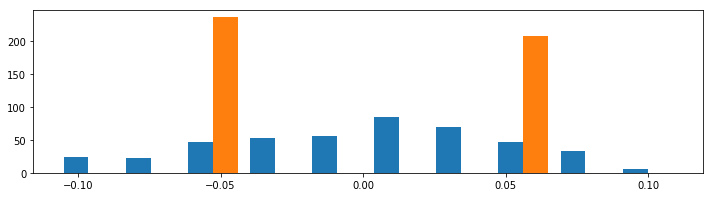

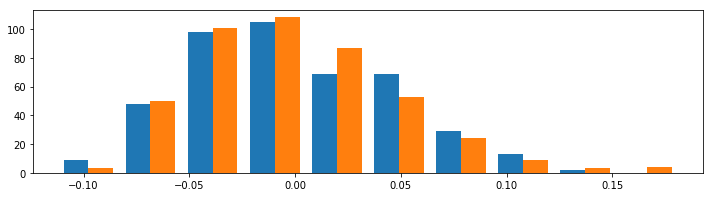

In [89]:
plt.figure(figsize=(12, 3))
plt.hist([data["q1"], data["q2"]])
plt.show()
plt.figure(figsize=(12, 3))
p = plt.hist([data["q4"], data["q7"]])
plt.show()

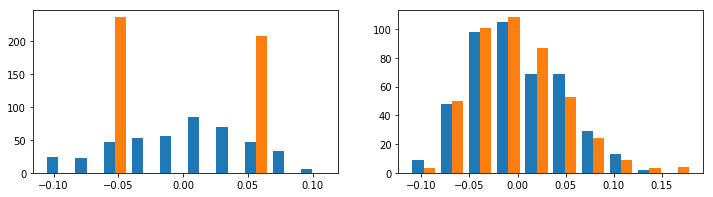

In [90]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.hist([data["q1"], data["q2"]])
plt.subplot(1, 2, 2)
p = plt.hist([data["q4"], data["q7"]])

Построй гистограмму для "doze" и вычисли среднюю дозу инсулина:

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

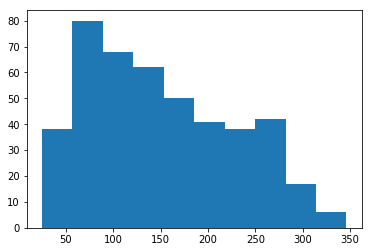

In [91]:
#<твой код>
#plt.figure(figsize=(12, 3))
plt.hist([y])
#plt.figure(figsize=(12, 3))
#p = plt.hist([data["q4"], data["q7"]])
#plt.show()

In [92]:
average_doze = data.doze.mean() #<твой код>
print(average_doze)

152.13348416289594


Посмотрим теперь на зависимость чего-нибудь одного от чего-нибудь другого:

x -- первый признак

y -- второй признак

цвет -- величина дозы

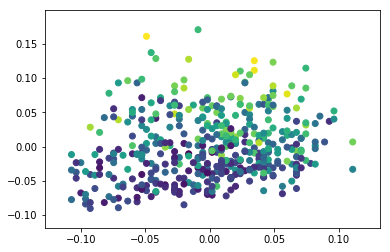

In [93]:
plt.scatter(data["q1"], data["q3"], c=data["doze"] / np.max(data["doze"]))

Построй scatter (график из точек) для признаков q3, q4.

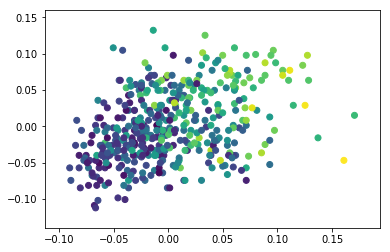

In [94]:
plt.scatter(data["q3"], data["q4"], c=data["doze"] / np.max(data["doze"]))

## Сделай сам!
Напишем теперь свою линейную регрессию и применим её для предсказания оптимальных доз инсулина для больных сахарным диабетом.

### Построение модели

In [95]:
W = np.array([-0.5, 0.5, -0.5, 0.5, -0.5, -0.5, 0.5, 0.5, 0.5, -0.5, 150])

def predict(W, X):
    """получить прогноз h(X|w)"""
    
    # размерность ответа
    size = X.shape[0]
    #<твой код>
    
    pred = []
    for i in range(size):
        # i-ая строчка выборки примеров
        X_i = X[i] #<твой код>
        
        # прогноз модели для i-ой строчки (объекта)
        pred_i = X_i.dot(W) #<твой код>
        
        pred.append(pred_i)
    
    return np.array(pred)

In [98]:
W = np.array([0.5, 0.5, -0.5, 0.5, -0.5, -0.5, 0.5, 0.5, 0.5, -0.5, 150])
pred = predict(W, X)
print(pred.shape)
#print(pred)

(442,)


In [99]:
error = np.sqrt(np.sum(np.power(y-pred, 2)))
squared_error = np.power(error, 2)
 #<твой код>
def loss(X, y, W):
    """функция потерь J(X, y, W)"""
    global error
    # предсказание по модели
    pred = predict(W, X) #<твой код>
    
    # вектор разностей предсказаний и реальных значений
    error = pred -y #<твой код> 
    
    # вектор из квадратов ошибок
    squared_error = np.power(error, 2) #<твой код>
    
    # среднее по ним
    mean_squared_error = squared_error.mean() #<твой код>

    return mean_squared_error
#print(error)

In [100]:
mse = loss(X, y, W)
print(mse)

5934.736802032845


In [101]:
def gradient(X, y, W):
    """вектор градиента функции потерь"""
    
    # размер вектора градиента
    len_gradient = len(W) #<твой код>
    
    gradient = []
    
    # вспомогательные вычисления
    gradient=X.T.dot(X.dot(W)-y)
    
    return np.array(gradient)

In [102]:
grad = gradient(X, y, W)
print(grad.shape)
print(grad)

(11,)
[-303.71183408  -69.19361338 -949.80416622 -714.32417473 -343.66701308
 -282.34423328  639.15295057 -697.06306452 -915.99433801 -619.47107981
 -943.        ]


In [103]:
?train_test_split

In [104]:
def train_model(X, y, step=0.001, n_steps=100):
    # создадим нулевой вектор весов
    ## сколько должно быть весов
    global W
    len_w = W.shape[0] #<твой код>
    W = np.zeros(len_w)
    
    for i in range(n_steps):
        # новый вектор весов
        W = W-gradient(X, y, W) * step
        #<твой код>

    return W

### Обучение модели
Для дальнейшей проверки надо разбить выборку на train и test, для этого в sklearn есть функция `train_test_split`:

In [105]:
from sklearn.model_selection import train_test_split

a1 = [1, 2, 3, 4, 5]
a2 = [5, 4, 3, 2, 1]
print(train_test_split(a1, a2, train_size=0.6))

[[4, 1, 3], [5, 2], [2, 5, 3], [1, 4]]


In [106]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

Раздели выборку на обучающую и тестовую (размер обучающей выборки -- три четверти), выведи их размеры.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #<твой код>
#<твой код>

Обучи модель на тренировочной выборке:

In [108]:
W = train_model(X, y) #<твой код>

### Оценка качества
Получи прогноз на тренировочной и тестовой выборке:

In [109]:
y_train_predict = predict(W, X_train)#<твой код>
y_test_predict =  predict(W, X_test)#<твой код>

Посчитай среднеквадратичные ошибки:

In [110]:
x_train_error = loss(X_train, y_train, W) #<твой код>
x_test_error = loss(X_test, y_test, W) #<твой код>

In [111]:
print("ошибка на X_train: %s" % x_train_error)
print("ошибка на X_test: %s" % x_test_error)

ошибка на X_train: 4571.362948911723
ошибка на X_test: 5027.074969604535


## Scikit-learn

Сгенерируем простенькие данные для линейной регрессии:

In [117]:
# 50 чисел от 0 до 10
lo = pandas.DataFrame(np.arange(0, 10, 0.2), columns=[1])
# целевая переменная -- зашумлённые значения X
la = lo + 3 * (np.random.RandomState(153).random_sample(lo.shape) - 0.5)
lo_train, lo_test, la_train, la_test = train_test_split(la, lo, random_state=153, train_size=0.6)

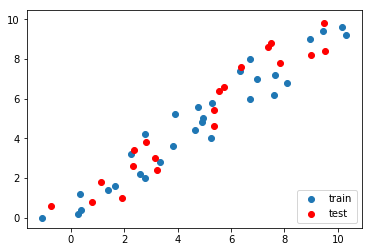

In [118]:
plt.scatter(lo_train, la_train, label='train')
plt.scatter(lo_test, la_test, c='r', label='test')
plt.legend(loc='lower right')

Объект класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) -- классификатор с заданными параметрами. Наиболее важные методы классификатора: *fit*, *predict*.

In [119]:
# подключение класса из модуля sklearn
from sklearn.linear_model import LinearRegression

In [120]:
# cоздать
linreg_model = LinearRegression()
# обучить по train
linreg_model.fit(lo_train, la_train)
# предсказать для test
la_pred = linreg_model.predict(lo_test)

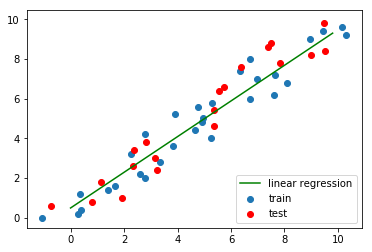

In [123]:
la_plot = linreg_model.predict(lo)
plt.scatter(lo_train, la_train, label='train')
plt.scatter(lo_test, la_test, c='r', label='test')
plt.plot(lo, la_plot, c='g', label='linear regression')
plt.legend(loc="lower right")

Ошибка предсказаний характеризует, насколько сильно истинные значения **Y_test** отличаются от предсказанных **Y_pred**.

Посмотрим на среднеквадратичную ошибку (MSE -- Mean Squared Error):

In [134]:
from sklearn.metrics import mean_squared_error

print("Train MSE error:", mean_squared_error(la_train, linreg_model.predict(lo_train)))
print("Test MSE error:", mean_squared_error(la_test, la_pred))

Train MSE error: 0.5248705577258203
Test MSE error: 0.7338054901691582


### *Для развлечения на потом*
Можно сравнить качество и скорость работы (%%time -- см. titanic_01) своей линейной регрессии с sklearn-овской.

## Добавление признаков

Попробуем улучшить качество модели за счёт добавления степеней переменной $x$.

Добавь в таблицу X степени до $8$-ой включительно.

In [127]:
poly_lo = lo.copy()
#<твой код>

In [131]:
for i in range(2,9):
    poly_lo[str(i)] = poly_lo.iloc[:, 0]**i

In [132]:
poly_lo[:3]

,1,2,3,4,5,6,7,8
0,0.0,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000
1,0.2,0.04,0.008,0.0016,0.00032,0.000064,0.000013,0.000003
2,0.4,0.16,0.064,0.0256,0.01024,0.004096,0.001638,0.000655


Разобьём выборку с новыми признаками на train и test:

In [133]:
poly_lo_train, poly_lo_test = train_test_split(poly_lo, random_state=153, train_size=0.6)

C:\Users\Marina bar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Обучи модель линейной регрессии на новых признаках:

In [138]:
# cоздать
poly_linreg_model = LinearRegression()

# обучить по train
poly_linreg_model.fit(poly_lo_train, poly_la_train)
poly_la_pred = linreg_model.predict(poly_lo_test)
#<твой код>

# предсказать для test
#<твой код>

NameError: name 'poly_la_train' is not defined

Нарисуем новый график (просто выполни ячейку):

In [137]:
poly_la_plot = poly_linreg_model.predict(poly_lo)

plt.scatter(lo_train, la_train, label='train')

plt.scatter(lo_test, la_test, c='r', label='test')

plt.plot(lo, poly_la_plot, c='g', label='linear regression')

plt.legend(loc="lower right")

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Посмотрим теперь на ошибки на train и test -- получился слишком сильный подгон под обучающую выборку:

In [ ]:
print("Train MSE error:", mean_squared_error(Y_train, poly_linreg_model.predict(poly_X_train)))
print("Test MSE error:", mean_squared_error(Y_test, poly_Y_pred))

С увеличением степени признаков ошибка на обучающей выборке будет уменьшаться, а на тестовой -- увеличиваться.

## Как с этим бороться?
Регуляризованная линейная регрессия [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) в sklearn:

In [ ]:
from sklearn.linear_model import Ridge

# alpha -- коэффициент регуляризации
# чем он больше, тем сильнее ограничивается модель
reg_linreg_model = Ridge(alpha=5, random_state=153)

reg_linreg_model.fit(poly_X_train, Y_train)

reg_Y_pred = reg_linreg_model.predict(poly_X_test)

In [ ]:
reg_Y_plot = reg_linreg_model.predict(poly_X)
plt.scatter(X_train, Y_train, label='train')
plt.scatter(X_test, Y_test, c='r', label='test')
plt.plot(X, reg_Y_plot, c='g', label='linear regression')
plt.legend(loc="lower right")

Теперь ошибки на train и test отличаются не так сильно:

In [ ]:
print("Train MSE error:", mean_squared_error(Y_train, reg_linreg_model.predict(poly_X_train)))
print("Test MSE error:", mean_squared_error(Y_test, reg_Y_pred))